In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt

import utilities

COLORS = utilities.ColorGenerator.COLORS

In [29]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [30]:
# Rename column Whole weight.1 --> Shucked weight and Whole weight.2 --> Viscera weight
rename_mapping = {'Whole weight': 'Whole_weight', 'Shell weight': 'Shell_weight', 
                  'Whole weight.1': 'Shucked_weight', 'Whole weight.2': 'Viscera_weight'}

df_train = df_train.rename(columns=rename_mapping)
df_test = df_test.rename(columns=rename_mapping)

### DATA BASE INFOS

In [31]:
print('_______Train_______')
df_train.head()

_______Train_______


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [32]:
print('_______Test_______')
df_test.head()

_______Test_______


,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [33]:
df_train.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [34]:
df_test.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
count,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000,60411.000000
mean,120820.000000,0.517428,0.401961,0.135751,0.790062,0.341227,0.169419,0.226125
std,17439.297893,0.117609,0.097470,0.038175,0.457591,0.204221,0.100720,0.129826
min,90615.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,105717.500000,0.450000,0.345000,0.110000,0.419500,0.178500,0.086500,0.120000
50%,120820.000000,0.545000,0.425000,0.140000,0.801500,0.329000,0.166000,0.225000
75%,135922.500000,0.600000,0.470000,0.160000,1.070000,0.464500,0.232500,0.305000
max,151025.000000,0.800000,0.650000,1.095000,2.825500,1.488000,0.641500,1.004000


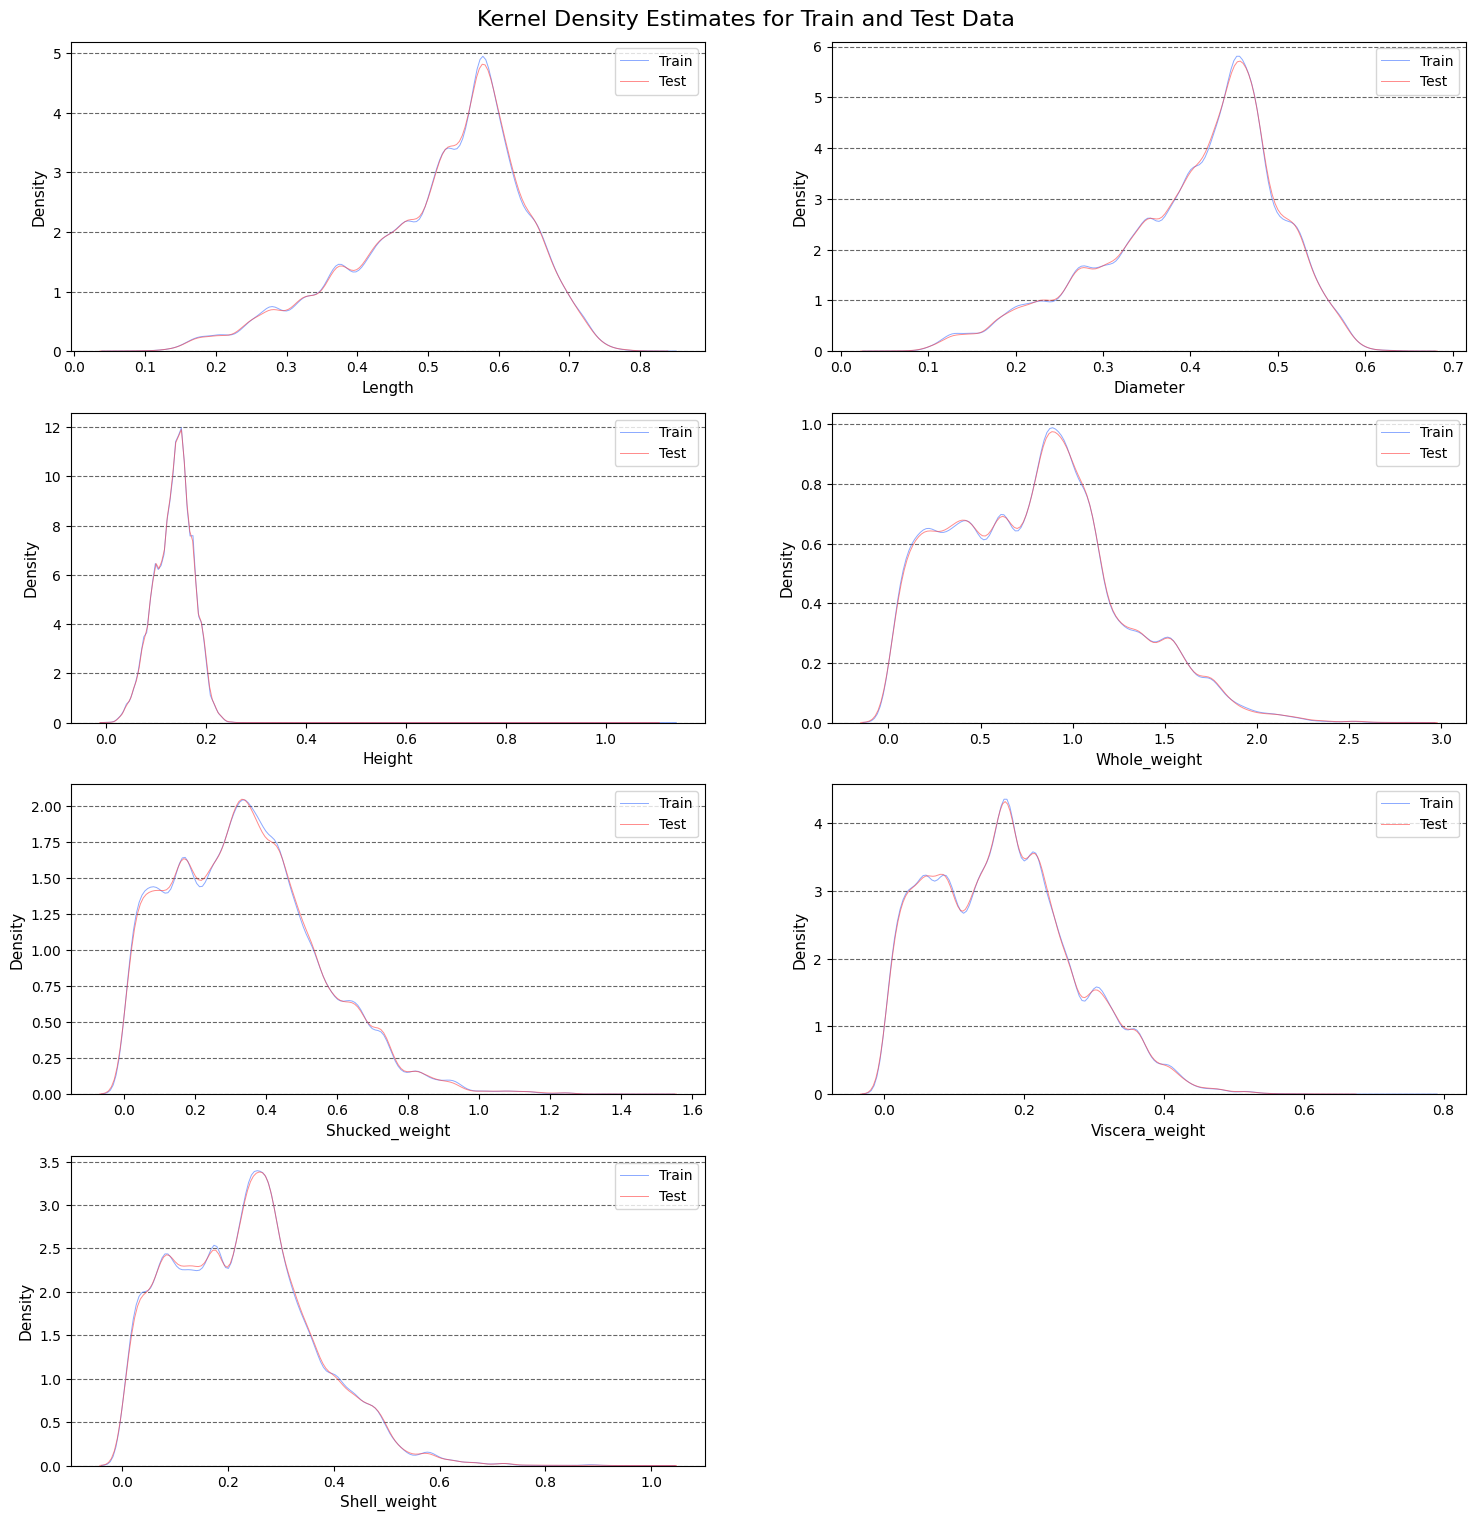

In [51]:
col_to_plot = df_test.drop(columns= ['id', 'Sex'], axis=1).columns

plt.figure(figsize=(18, 16))
plt.suptitle('Kernel Density Estimates for Train and Test Data', fontsize=16, y=1.02)
plt.subplots_adjust(top=1)
for i, col in enumerate(col_to_plot):
    ax = plt.subplot(4, 2, i+1)
    utilities.plot_kde(ax, [df_train, df_test], column=col, color=[COLORS['BLUE'], COLORS['RED']], labels=['Train', 'Test'])

The distribution of train and test data are identical

Is there any missing data:

In [10]:
df_temp = pd.DataFrame([df_train.isnull().sum(), df_test.isnull().sum()], index=['TRAIN', 'TEST'])
df_temp

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
TRAIN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TEST,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


No missing data!

### DATA ANALYSIS

Target distribution:

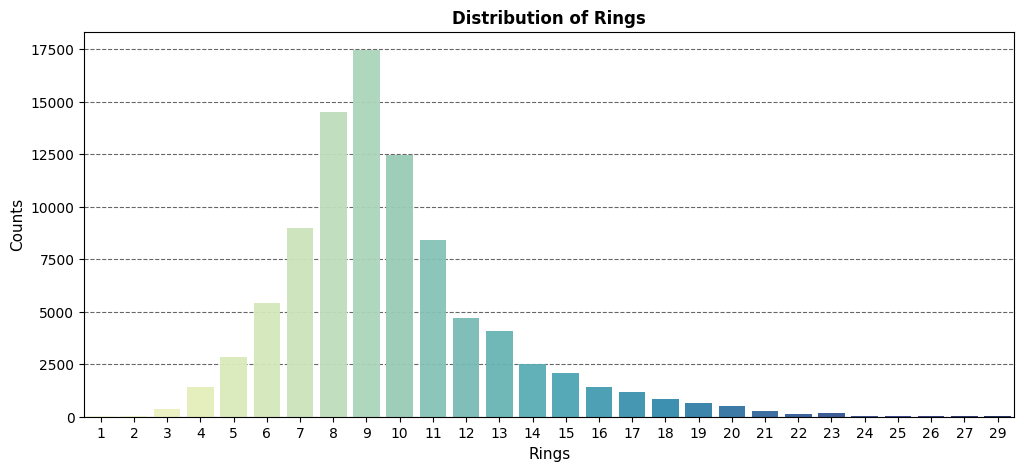

In [11]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
target_distrib = utilities.plot_hist_discrete_feature(ax, df_train, 'Rings', color='YlGnBu', 
                                                      add_value=False, linewidth=0, alpha=0.95)

Here the distribution of the number of rings depending on the Sex:

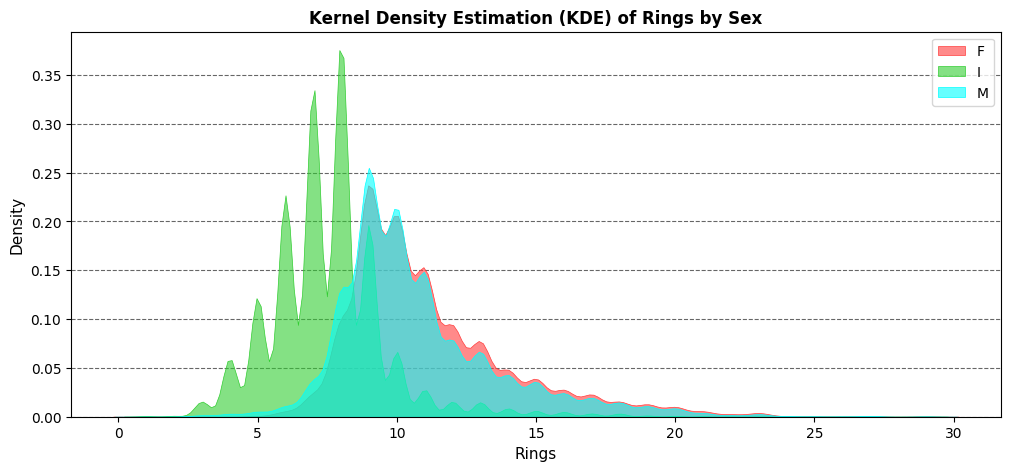

In [12]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(111)
utilities.plot_kde(ax, df_train, 'Rings', group_column='Sex', 
                   color=[COLORS['RED'], COLORS['GREEN'], COLORS['CYAN']], fill=True)

Or here another viz with some boxplots of Rings attributes but also other columns of the train dataset to see their distribution depending on the Sex:

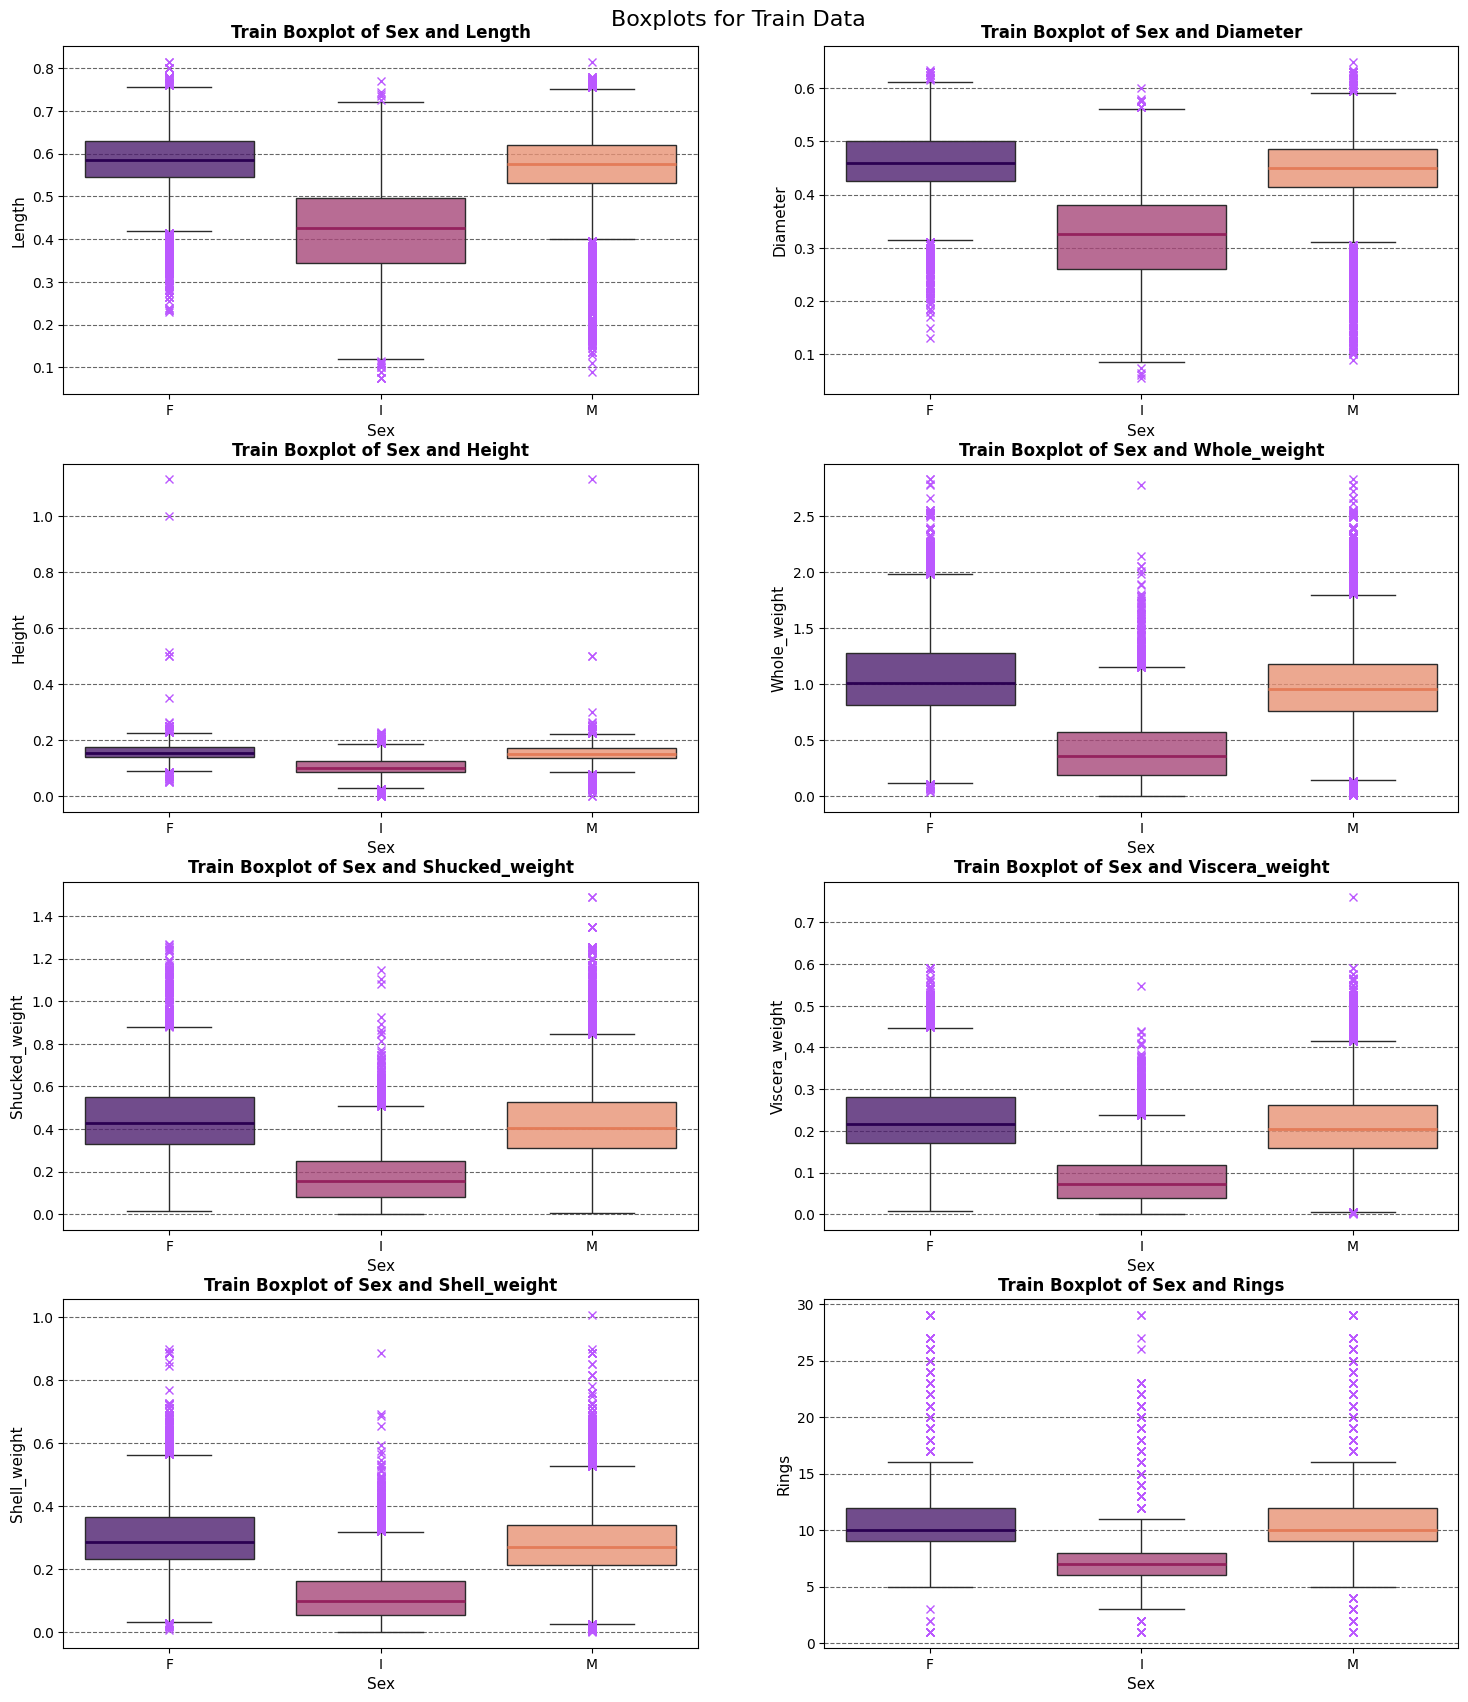

In [64]:
col_to_plot = df_train.drop(columns= ['id', 'Sex'], axis=1).columns

plt.figure(figsize=(18, 18))
plt.suptitle('Boxplots for Train Data', fontsize=16, y=1.02)
plt.subplots_adjust(top=1)
for i, col in enumerate(col_to_plot):
    ax = plt.subplot(4, 2, i+1)
    utilities.plot_boxplot(ax, df_train, 'Sex', col, color='magma', 
                           title_before='Train ', median_style={'linewidth': 2}, 
                           outlier_style={'marker':'x', 'markeredgecolor':COLORS['PURPLE']})

### CORRELATION

We can already convert 'Sex' column to a boolean (True if 'M' and false if not)

In [13]:
change_sex_type = lambda sex: 0. if sex == 'I' else (1. if sex == 'M' else 2.)

df_train['Sex'] = df_train['Sex'].apply(change_sex_type)
df_test['Sex']  = df_test['Sex'].apply(change_sex_type)

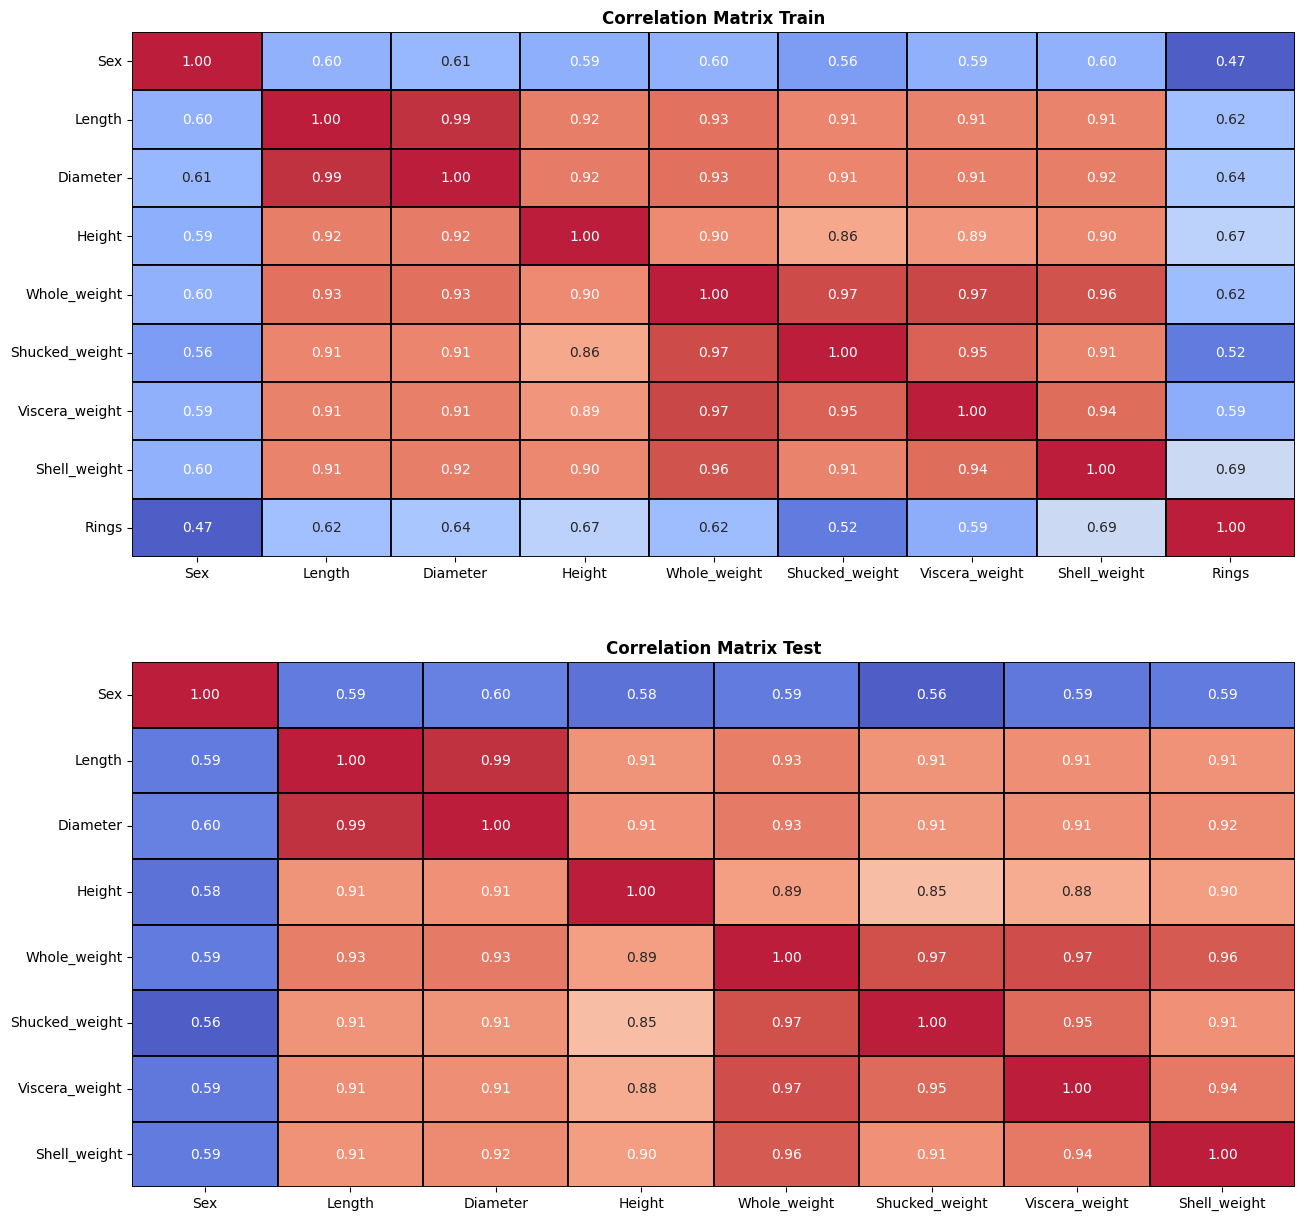

In [14]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(211)
corr_matrix_train = utilities.plot_correlation_matrix_heatmap(ax, df_train.drop(columns= ['id']), cmap='coolwarm', title_after=' Train')
ax = plt.subplot(212)
corr_matrix_test = utilities.plot_correlation_matrix_heatmap(ax, df_test.drop(columns= ['id']), cmap='coolwarm', title_after=' Test')

# Print Top 3 Correlations for each column
# for column in corr_matrix.columns:
#     print(f'\nTop 3 Correlations for {column}:')
#     dict_temp = corr_matrix[column].sort_values(ascending=False).to_dict()
    
#     for i, (key, value) in enumerate(list(dict_temp.items())[1:4], 1):
#         print(f'{i}. {key}: {value:.2f}')
    
#     print()

As we can see feature are highly related (it's not unlogical cause they are measurement of the body)

We don't have a lot of feature, so one of the goal will be to do some feature engineering to bring more complexity

### FEATURE ENGINEERING

At first, we can add a weight (blood weight in that case) that is just the Whole weight - all others weights

In [15]:
add_blood_weight = lambda row: row['Whole_weight'] - (row['Shell_weight'] + row['Shucked_weight'] + row['Viscera_weight'])

df_train['Blood_weight'] = df_train.apply(add_blood_weight, axis=1)
df_test['Blood_weight'] = df_test.apply(add_blood_weight, axis=1)

We can also add other ration and yield (from https://www.kaggle.com/competitions/playground-series-s4e4/discussion/494344?rvi=1)

In [16]:
compute_meat_yield = lambda row: row['Shucked_weight'] / (row['Whole_weight'] + row['Shell_weight'])
compute_shell_ratio = lambda row: row['Shell_weight'] / row['Whole_weight']
compute_weight_to_shucked_weight = lambda row: row['Whole_weight'] / row['Shucked_weight'] if row['Shucked_weight'] != 0 else 0
compute_viscera_ratio = lambda row: row['Viscera_weight'] / row['Whole_weight']

ratio_functions = {"Meat_Yield": compute_meat_yield, "Shell_Ratio": compute_shell_ratio, 
                   "Weight_to_Shucked_Weight": compute_weight_to_shucked_weight, "Viscera_Ratio": compute_viscera_ratio}

for key, func in ratio_functions.items():
    df_train[key] = df_train.apply(func, axis=1)
    df_test[key] = df_test.apply(func, axis=1)

In [17]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Blood_weight,Meat_Yield,Shell_Ratio,Weight_to_Shucked_Weight,Viscera_Ratio
0,0,2.0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,0.0565,0.324765,0.311082,2.348554,0.189890
1,1,2.0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,0.0755,0.315862,0.283186,2.467249,0.244690
2,2,0.0,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.0075,0.211538,0.238095,3.818182,0.142857
3,3,1.0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.0835,0.322456,0.273373,2.435419,0.224713
4,4,0.0,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.0550,0.377233,0.252558,2.116373,0.204604


In [18]:
# Use models to predict the Rings usin RMSLE as the metric
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

X = df_train.drop(columns=['id', 'Rings'])
y = df_train['Rings']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))
print(f'RMSLE: {rmsle:.4f}')

# Predict the Rings for the test data
X_test = df_test.drop(columns=['id'])
y_test = model.predict(X_test)

# Return a CSV id, Rings
df_submission = pd.DataFrame({'id': df_test['id'], 'Rings': y_test})

RMSLE: 0.1560


In [19]:
df_submission.to_csv('submission.csv', index=False)